In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os.path
import requests

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [2]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
local_file_name = './local_data_covid.csv'
if not os.path.isfile(local_file_name):
    print('file does not exist, downloading...')
    resource = requests.get(data_url, allow_redirects=True)
    print(resource)
    output = open(local_file_name,"wb")
    output.write(resource.content)
    output.close()
    print('local file saved with name : ', local_file_name)

In [3]:
raw_data = pd.read_csv(local_file_name, skiprows=0)
raw_data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
249                                           NaN             Timor-Leste   
250                                           NaN                    Togo   
251                                           NaN     Trinidad and Tobago   
252                                           NaN                 Tunisia   
253                                           NaN                  Turkey   
254                                           NaN                      US   
255                                           NaN                  Uganda   
256                                           NaN                 Ukraine   
257                                           NaN    United Arab Emirates   
258                                      Anguilla          United Kingdom   
259                                       Bermuda          United Kingdom   
260                        British Virgin Islands          United Kingdom   
261                                Cayman Islands          United Kingdom   
262                               Channel Islands          United Kingdom   
263                   Falkland Islands (Malvinas)          United Kingdom   
264                                     Gibraltar          United Kingdom   
265                                   Isle of Man          United Kingdom   
266                                    Montserrat          United Kingdom   
267  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
268                      Turks and Caicos Islands          United Kingdom   
269                            

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Province/State          Country/Region        Lat        Long  1/22/20  \
0              NaN             Afghanistan  33.939110   67.709953        0   
1              NaN                 Albania  41.153300   20.168300        0   
2              NaN                 Algeria  28.033900    1.659600        0   
3              NaN                 Andorra  42.506300    1.521800        0   
4              NaN                  Angola -11.202700   17.873900        0   
5              NaN     Antigua and Barbuda  17.060800  -61.796400        0   
6              NaN               Argentina -38.416100  -63.616700        0   
7              NaN                 Armenia  40.069100   45.038200        0   
16             NaN                 Austria  47.516200   14.550100        0   
17             NaN              Azerbaijan  40.143100   47.576900        0   
18             NaN                 Bahamas  25.025885  -78.035889        0   
19             NaN                 Bahrain  26.027500   50.550000        0   
20             NaN              Bangladesh  23.685000   90.356300        0   
21             NaN                Barbados  13.193900  -59.543200        0   
22             NaN                 Belarus  53.709800   27.953400        0   
23             NaN                 Belgium  50.833300    4.469936        0   
24             NaN                  Belize  17.189900  -88.497600        0   
25             NaN                   Benin   9.307700    2.315800        0   
26             NaN                  Bhutan  27.514200   90.433600        0   
27             NaN                 Bolivia -16.290200  -63.588700        0   
28             NaN  Bosnia and Herzegovina  43.915900   17.679100        0   
29             NaN                Botswana -22.328500   24.684900        0   
30             NaN                  Brazil -14.235000  -51.925300        0   
31             NaN                  Brunei   4.535300  114.727700        0   
32             NaN                Bulgaria  42.733900   25.485800        0   
33             NaN            Burkina Faso  12.238300   -1.561600        0   
34             NaN                   Burma  21.916200   95.956000        0   
35             NaN                 Burundi  -3.373100   29.918900        0   
36             NaN              Cabo Verde  16.538800  -23.041800        0   
37             NaN                Cambodia  11.550000  104.916700        0   
..             ...                     ...        ...         ...      ...   
238            NaN               Sri Lanka   7.873054   80.771797        0   
239            NaN                   Sudan  12.862800   30.217600        0   
240            NaN    Summer Olympics 2020  35.649100  139.773700        0   
241            NaN                Suriname   3.919300  -56.027800        0   
242            NaN                  Sweden  60.128161   18.643501        0   
243            NaN             Switzerland  46.818200    8.227500        0   
244            NaN                   Syria  34.802075   38.996815        0   
245            NaN                 Taiwan*  23.700000  121.000000        1   
246            NaN              Tajikistan  38.861000   71.276100        0   
247            NaN                Tanzania  -6.369028   34.888822        0   
248            NaN                Thailand  15.870032  100.992541        4   
249            NaN             Timor-Leste  -8.874217  125.727539        0   
250            NaN                    Togo   8.619500    0.824800        0   
251            NaN     Trinidad and Tobago  10.691800  -61.222500        0   
252            NaN                 Tunisia  33.886917    9.537499        0   
253            NaN                  Turkey  38.963700   35.243300        0   
254            NaN                      US  40.000000 -100.000000        1   
255            NaN                  Uganda   1.373333   32.290275        0   
256            NaN                 Ukraine  48.379400   31.165600        0   
257            NaN    Unit

In [5]:
raw_data[raw_data["Province/State"]=="Hong Kong"]

Province/State Country/Region   Lat   Long  1/22/20  1/23/20  1/24/20  \
70      Hong Kong          China  22.3  114.2        0        2        2   

    1/25/20  1/26/20  1/27/20   ...     8/1/21  8/2/21  8/3/21  8/4/21  \
70        5        8        8   ...      11987   11990   11994   11996   

    8/5/21  8/6/21  8/7/21  8/8/21  8/9/21  8/10/21  
70   12002   12004   12011   12013   12015    12019  

[1 rows x 571 columns]

In [6]:
raw_data = raw_data.drop("Lat", axis=1)
raw_data = raw_data.drop("Long", axis=1)

In [7]:
data = raw_data.copy()

In [8]:
data.at["Country/Region","70"] = "Hong Kong"

In [9]:
data.loc[data["Province/State"] == "Hong Kong", "Country/Region"] = "Hong Kong"

In [10]:
data[data["Province/State"] == "Hong Kong"]

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
70      Hong Kong      Hong Kong      0.0      2.0      2.0      5.0      8.0   

    1/27/20  1/28/20  1/29/20 ...    8/2/21   8/3/21   8/4/21   8/5/21  \
70      8.0      8.0     10.0 ...   11990.0  11994.0  11996.0  12002.0   

     8/6/21   8/7/21   8/8/21   8/9/21  8/10/21   70  
70  12004.0  12011.0  12013.0  12015.0  12019.0  NaN  

[1 rows x 570 columns]

In [18]:
country_list = ["Belgium", "China", "Hong Kong", "France", "Germany",
                "Iran", "Italy", "Japan", "Korea, South", "Netherlands",
                "Portugal", "Spain", "United Kingdom", "US"]
data = data[data["Country/Region"].isin(country_list)]
dataToPlot = data.drop("Province/State", axis=1)

In [21]:
dataToPlot = dataToPlot.groupby(['Country/Region']).sum()

In [28]:
def converttodate(date):
    pdate = pd.to_datetime(date, format='%m/%d/%y')
    return pdate
dataToPlot.columns = [converttodate(date) for date in dataToPlot.columns]

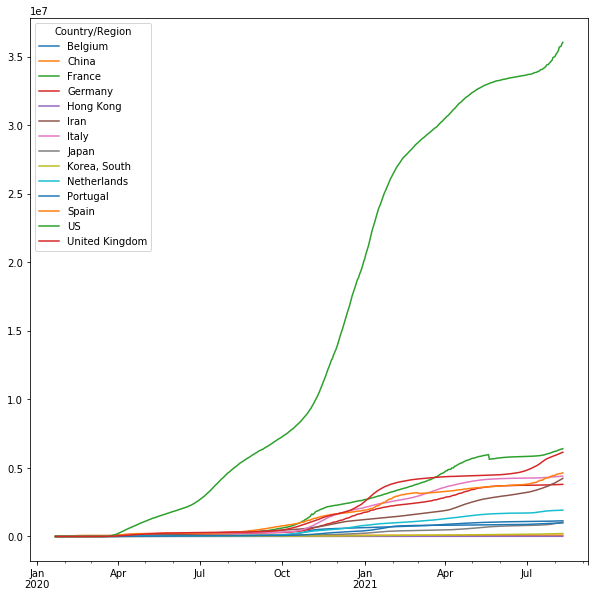

In [29]:
dataToPlot.T.plot(figsize=(10,10))